## ComCam SNe
Ryan Lau (Rubin CST) - March 13, 2025

In [1]:
import lsst.daf.butler as dafButler
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import IsolationForest

In [2]:
filter_names = ['u', 'g', 'r', 'i', 'z', 'y']
filter_colors = {'u': '#0c71ff', 'g': '#49be61', 'r': '#c61c00',
                 'i': '#ffc200', 'z': '#f341a2', 'y': '#5d0000'}
filter_symbols = {'u': 'o', 'g': '^', 'r': 'v', 'i': 's', 'z': '*', 'y': 'p'}
filter_linestyles = {'u': '--', 'g': ':', 'r': '-', 'i': '-.',
                     'z': (0, (3, 5, 1, 5, 1, 5)), 'y': (0, (3, 1, 1, 1))}

In [3]:
collection = "LSSTComCam/runs/DRP/DP1/w_2025_09/DM-49235"
b_embargo = dafButler.Butler("/repo/main", collections=collection)
registry = b_embargo.registry

In [4]:
dataId = {'band': 'i', 'tract': 5063, 'skymap': 'lsst_cells_v1'}

diaobjects = b_embargo.get('diaObjectTable_tract', dataId = dataId)
diasrcs = b_embargo.get('diaSourceTable_tract', dataId = dataId)

In [5]:
DiaObjs = diaobjects[diaobjects['nDiaSources']>5]
DiaObjs = DiaObjs[DiaObjs['r_scienceFluxMean'] < 10**5]
DiaObjs = DiaObjs[DiaObjs['r_psfFluxNdata'] > 5]

In [6]:
sample = DiaObjs[[
    'r_psfFluxMean',
    'r_psfFluxLinearSlope',
    'r_psfFluxSigma',
    ]].values

rng = np.random.RandomState(42)

ifo = IsolationForest(max_samples=500,
                      random_state=rng, n_jobs=1)
ifo.fit(sample)
idx = np.argsort(ifo.score_samples(sample))[:20]

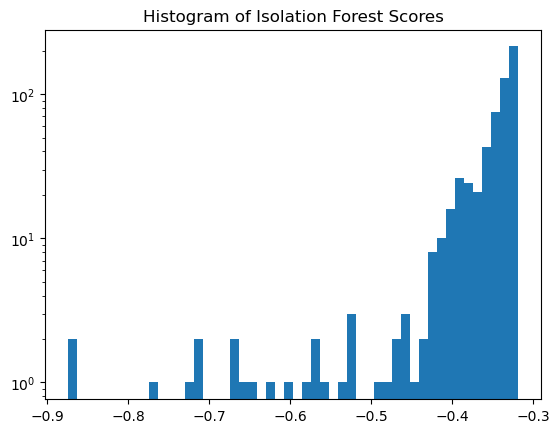

In [7]:
plt.title('Histogram of Isolation Forest Scores')
plt.hist(ifo.score_samples(sample), bins=50)
plt.yscale('log')
plt.show()

Plotting top 20 outliers

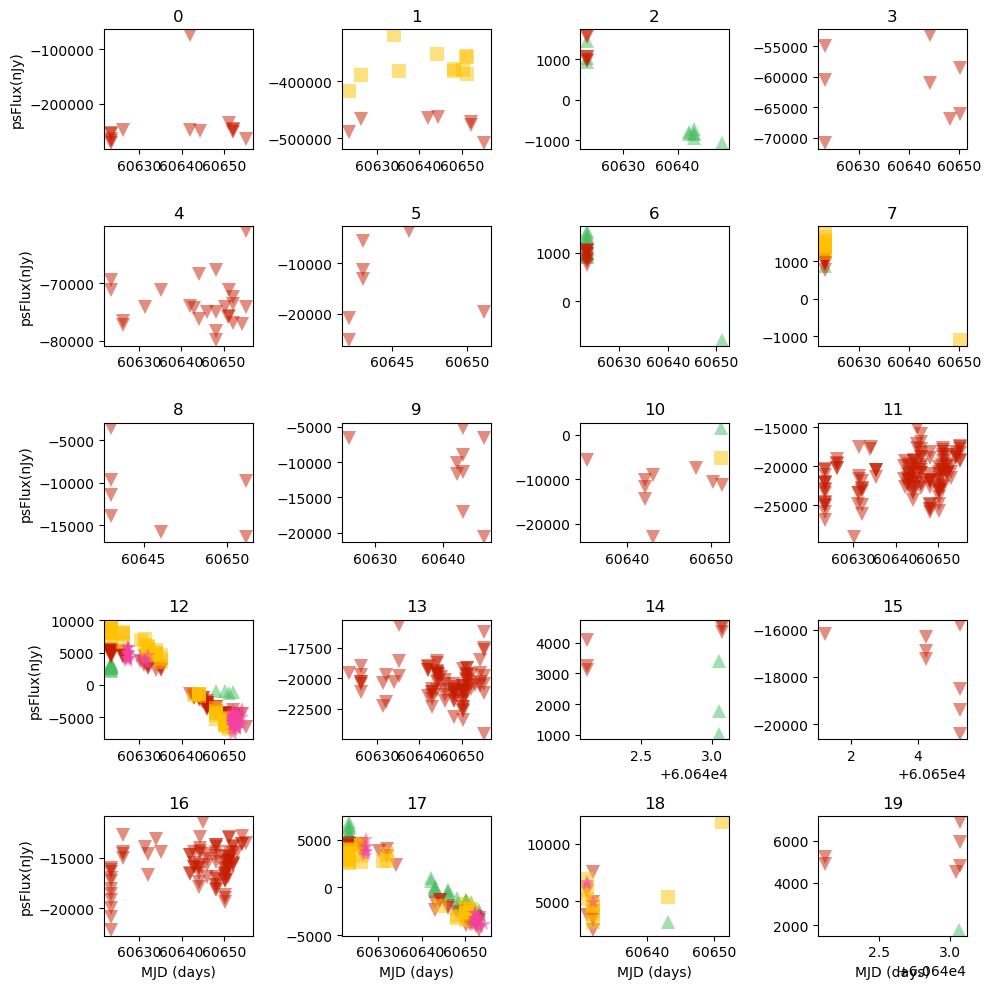

In [8]:
fig, ax = plt.subplots(5, 4, figsize=(10, 10), sharey=False, sharex=False)

n = 0
#filters = ['r']

for i in range(5):
    for j in range(4):
        for f, filt in enumerate(filter_names):
            diasrcs_A = diasrcs[diasrcs['diaObjectId']==DiaObjs.index[idx[n]]]
            fx = np.where(diasrcs_A['band'] == filt)[0]
            ax[i, j].plot(diasrcs_A['midpointMjdTai'].iloc[fx], diasrcs_A['psfFlux'].iloc[fx],
                             filter_symbols[filt], ms=10, mew=0, alpha=0.5,
                          color=filter_colors[filt])

        ax[i, j].set_title(n)

        if i == 4:
            ax[i, j].xaxis.set_label_text('MJD (days)')
        if j == 0:
            ax[i, j].yaxis.set_label_text('psFlux(nJy)')

        n += 1
        #del results

plt.tight_layout()
plt.show()

### Number 12 should be Dan Taranu's Supernova; ra, dec = (53.124767,-27.739815)
DiaObjectID = 2226880482153332831

Note a ZTF alert was made for this event: https://antares.noirlab.edu/loci/ANT2024yka2g4skltqt

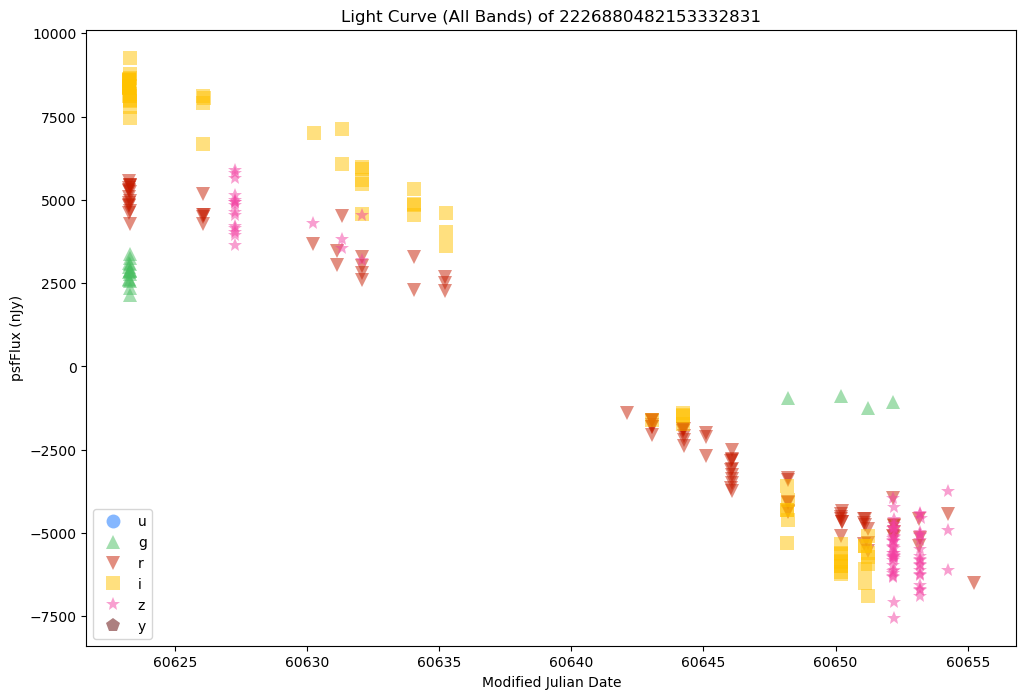

DiaObject 2226880482153332831 located at ra, dec = (53.124767,-27.739815)


/tmp/ipykernel_10236/2195515523.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('DiaObject %i located at ra, dec = (%f,%f)' %(DiaObjs.index[idx[ind_SN]], ra_A,dec_A))


In [9]:
ind_SN = 12
ra_A = DiaObjs[DiaObjs.index==DiaObjs.index[idx[ind_SN]]]['ra'].values
dec_A = DiaObjs[DiaObjs.index==DiaObjs.index[idx[ind_SN]]]['dec'].values

fig, ax = plt.subplots(1, figsize=(12, 8))
diasrcs_A = diasrcs[diasrcs['diaObjectId']==DiaObjs.index[idx[ind_SN]]]
#DiaObjIds = list(set(diasrcs[coordcond]['diaObjectId']))
#filt = 'i'
for f, filt in enumerate(filter_names):
            fx = np.where(diasrcs_A['band'] == filt)[0]
            ax.plot(diasrcs_A['midpointMjdTai'].iloc[fx], diasrcs_A['psfFlux'].iloc[fx],
                          filter_symbols[filt], ms=10, mew=0, alpha=0.5,
                          color=filter_colors[filt], label = filter_names[f])
            del fx

ax.set_xlabel('Modified Julian Date')
ax.set_ylabel('psfFlux (nJy)')
ax.set_title('Light Curve (All Bands) of %i' % DiaObjs.index[idx[ind_SN]])
ax.legend(loc='lower left')
plt.show()

print('DiaObject %i located at ra, dec = (%f,%f)' %(DiaObjs.index[idx[ind_SN]], ra_A,dec_A)) 

### Number 17 a previously unidentified SN?; ra, dec = (53.112562,-27.684829)
DiaObjectID = 2226924462618443872

No ZTF alert went out for this event, but there does appear to be past variability from the host galaxy - https://antares.noirlab.edu/loci/ANT2020aehjsei

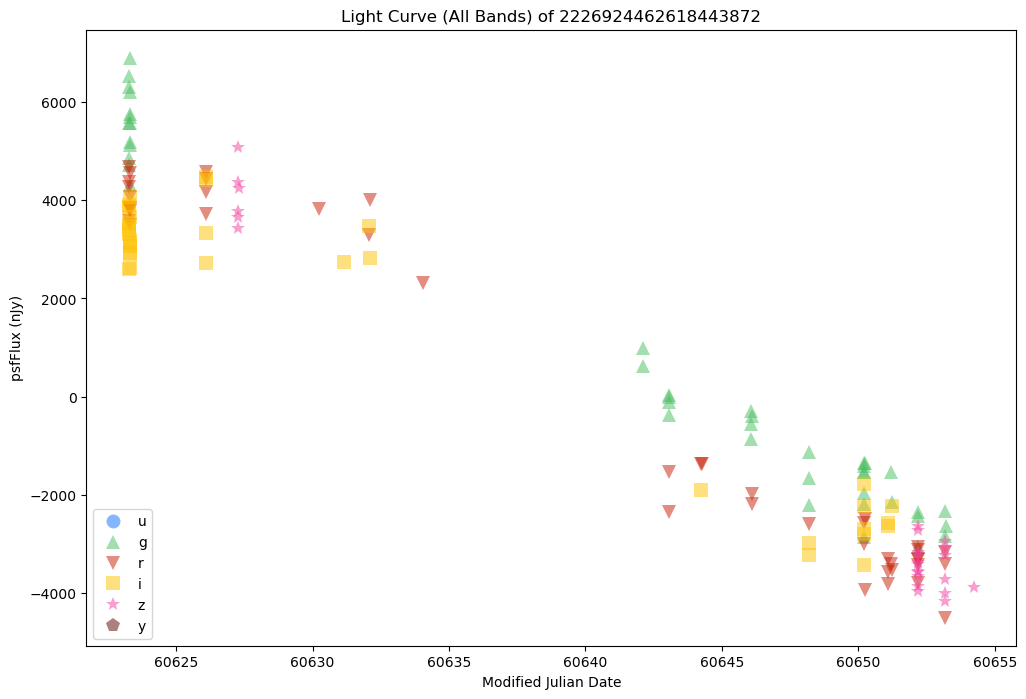

DiaObject 2226924462618443872 located at ra, dec = (53.112562,-27.684829)


/tmp/ipykernel_10236/2390151578.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('DiaObject %i located at ra, dec = (%f,%f)' %(DiaObjs.index[idx[ind_SN]], ra_A,dec_A))


In [10]:
ind_SN = 17
ra_A = DiaObjs[DiaObjs.index==DiaObjs.index[idx[ind_SN]]]['ra'].values
dec_A = DiaObjs[DiaObjs.index==DiaObjs.index[idx[ind_SN]]]['dec'].values

fig, ax = plt.subplots(1, figsize=(12, 8))
diasrcs_A = diasrcs[diasrcs['diaObjectId']==DiaObjs.index[idx[ind_SN]]]
#DiaObjIds = list(set(diasrcs[coordcond]['diaObjectId']))
#filt = 'i'
for f, filt in enumerate(filter_names):
            fx = np.where(diasrcs_A['band'] == filt)[0]
            ax.plot(diasrcs_A['midpointMjdTai'].iloc[fx], diasrcs_A['psfFlux'].iloc[fx],
                          filter_symbols[filt], ms=10, mew=0, alpha=0.5,
                          color=filter_colors[filt], label = filter_names[f])
            del fx

ax.set_xlabel('Modified Julian Date')
ax.set_ylabel('psfFlux (nJy)')
ax.set_title('Light Curve (All Bands) of %i' % DiaObjs.index[idx[ind_SN]])
ax.legend(loc='lower left')
plt.show()

print('DiaObject %i located at ra, dec = (%f,%f)' %(DiaObjs.index[idx[ind_SN]], ra_A,dec_A)) 